# Name:- C Rangrajan Kumar
# BI_ML_ASSIGNMENT_1

In [1]:
# Load the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
%matplotlib inline

In [2]:
# Import data
df1 = pd.read_csv("bank-marketing.csv")
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Part 1: Clean the data

#### Deal with missing data

In [3]:
# Step 1: Delete the rows which column 'poutcome' contains 'other'
condition = df1.poutcome == 'other'
df2 = df1.drop(df1[condition].index, axis = 0, inplace = False)

In [4]:
# Step 2: Replace 'unknown' in job and education with 'other'
df2[['job','education']] = df2[['job','education']].replace(['unknown'],'other')

#### Drop outliers in the column 'balance'

In [5]:
from scipy.stats import zscore

df2[['balance']].mean()
df2[['balance']].mean()

df2['balance_outliers'] = df2['balance']
df2['balance_outliers']= zscore(df2['balance_outliers'])

condition1 = (df2['balance_outliers']>3) | (df2['balance_outliers']<-3 )
df3 = df2.drop(df2[condition1].index, axis = 0, inplace = False)

In [6]:
df4 = df3.drop('balance_outliers', axis=1)

#### Creating and transforming data

- Some changes were made to the column name, units and data types for easier analysis.

In [7]:
# Step 1: Change column name: 'y' to 'response'
df4.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(df4, new_column, old_column):
    df4[new_column] = df4[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return df4[new_column].value_counts()

convert(df4, "response_binary", "response")

0    37785
1     4870
Name: response_binary, dtype: int64

In [8]:
# Step 2: Drop column "contact" which is useless
df5 = df4.drop('contact', axis=1)

In [9]:
# Step 3: Change the unit of 'duration' from seconds to minutes
df5['duration'] = df5['duration'].apply(lambda n:n/60).round(2)

In [10]:
# Step 4: Change 'month' from words to numbers for easier analysis
lst = [df5]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

####  Filtering

In [11]:
# Step 1: Drop rows that 'duration' < 5s
condition2 = (df5['duration']<5/60)
df6 = df5.drop(df5[condition2].index, axis = 0, inplace = False)

In [12]:
# Step 2: Drop customer values with 'other' education
condition3 = (df6['education'] == 'other')
df7 = df6.drop(df6[condition3].index, axis = 0, inplace = False)

## Part 2 : Data Visualization

In [13]:
df7.describe()

,age,salary,balance,day,duration,campaign,pdays,previous,response_binary,month_int
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,40.790676,57307.019906,1073.981807,15.863666,4.308949,2.774149,32.248304,0.436791,0.113587,6.166401
std,10.475473,31858.884521,1712.556186,8.313608,4.305823,3.104177,90.738402,1.572342,0.317313,2.362637
min,18.000000,0.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000,1.000000
25%,33.000000,20000.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000,0.000000,5.000000
50%,39.000000,60000.000000,421.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000,6.000000
75%,48.000000,70000.000000,1333.000000,21.000000,5.300000,3.000000,-1.000000,0.000000,0.000000,8.000000
max,95.000000,120000.000000,10443.000000,31.000000,81.970000,58.000000,871.000000,55.000000,1.000000,12.000000


#### 2.1  Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [14]:
df7.pdays.describe()

count    40841.000000
mean        32.248304
std         90.738402
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [15]:
df7.pdays.median()

-1.0

If we purely look at numerical summary ie mean and standard deviation, we can't see that lot of values is -1. We can see that 75% values of pdays are -1. So -1 has special meaning over here ie previous campaign was made to them or not. So in our case if we want to make decision on customer who did have campaign previously, then we must exclude all the cases of -1. So, by doing this we can get to customer who had previously campaign.

#### 2.2 -	Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?


pdays uses -1 as indicator and not value. Hence treat these value as missing

- Ignore these values in our average/median/state calculations.
- Keep it NaN as it is
- Wherever pdays is -1, replace with NaN

In [16]:
df8 = df7.copy()

In [17]:
df8.drop(df8[df8['pdays'] < 0].index, inplace = True) 

In [18]:
df8.pdays.describe()

count    6044.000000
mean      223.668101
std       112.385867
min         1.000000
25%       133.000000
50%       190.000000
75%       325.000000
max       871.000000
Name: pdays, dtype: float64

This time mean and median has changed significantly because we have removed the case where pdays value is -1 ie we have removed the customer that were not contacted previously for campaign.

#### 2.3 -	Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?


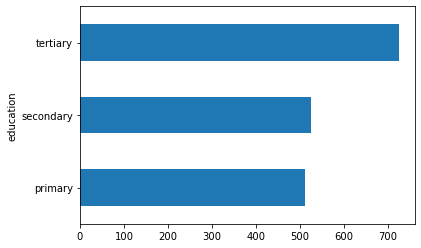

In [19]:
df8.groupby(['education'])['balance'].median().plot.barh()

Thus, we can conclude from graph that customer with tertiary level of education has highest median value for balance.

#### 2.4 Make a box plot for pdays. Do you see any outliers

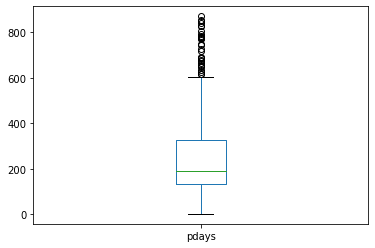

In [20]:
df8.pdays.plot.box()
plt.show()

Yes, from the above box plot we can see that there are outliers present in pdays.

- The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”. So performing bi-variate analysis to identify the features that are directly associated with the target variable.

#### 2.5 Converting the response variable to a convenient form

In [21]:
df8.response.value_counts(normalize=True)

no     0.755625
yes    0.244375
Name: response, dtype: float64

In [22]:
df8.replace({'response': {"yes": 1,'no':0}},inplace=True)

In [23]:
df8.response.value_counts()

0    4567
1    1477
Name: response, dtype: int64

## Part 3. Exploratory Data Analysis

#### 3.1 Visualize the distribution of 'age' and 'balance'

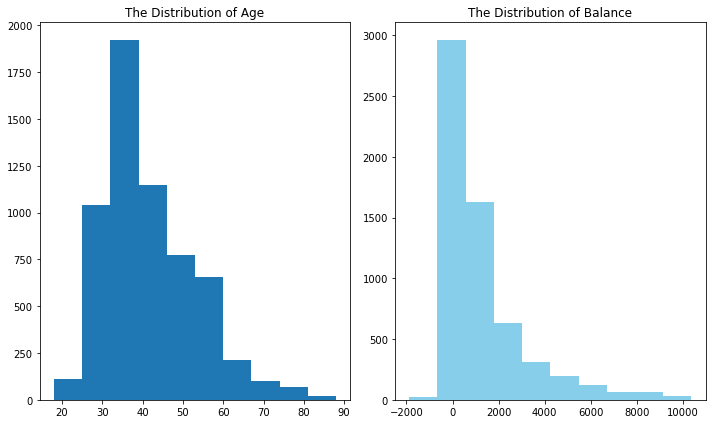

In [24]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(df8['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(df8['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

- The distribution of age: Majority of customers called is in the age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.

- The distribution of balance: After dropping outliers in balance, the range of balance is still massive, from a minimum of -6847 to a maximum of 10443 euros, giving a range of 17290 euros. The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels

#### 3.2 Visualize the relationship between 'age' and 'balance'

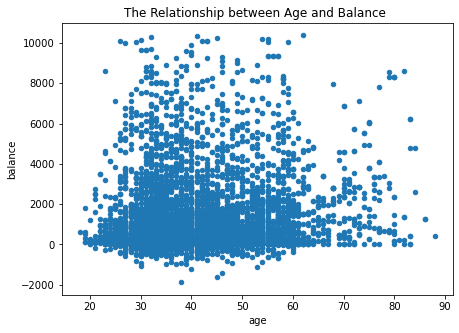

In [25]:
scatter_age_balance = df8.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

Based on this scatter plot, there is no clear relationship between client’s age and balance level.

Nevertheless, over the age of 60, clients tend to have a significantly lower balance, mostly under 5,000 euros. This is due to the fact that most people retire after 60 and no longer have a reliable income source.

#### 3.3 Visualize the distribution of 'duration' & 'campaign'

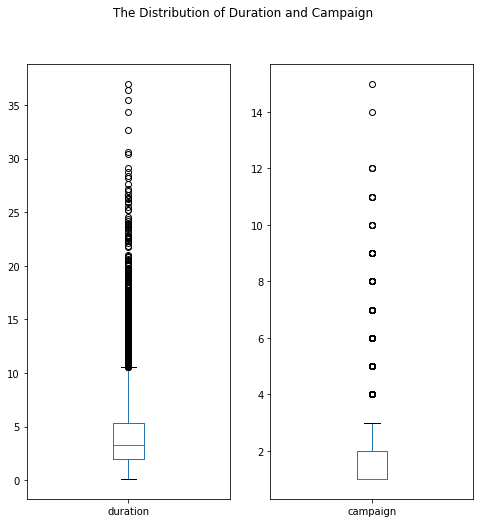

In [26]:
dist_dur_cam = df8[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

The distribution of duration: There is a large number of outliers ranging from 10 minutes to 40 minutes, which are worth further study.

The distribution of campagin: About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact.

#### 3.4 Scatter matrix and Correlation matrix

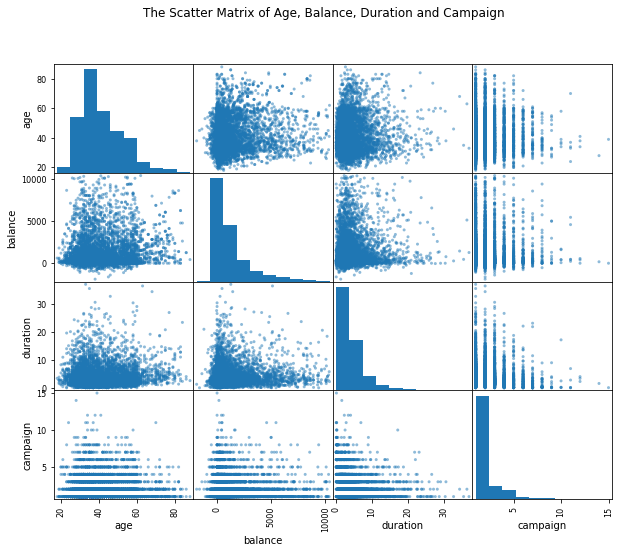

In [27]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(df8[['age','balance','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

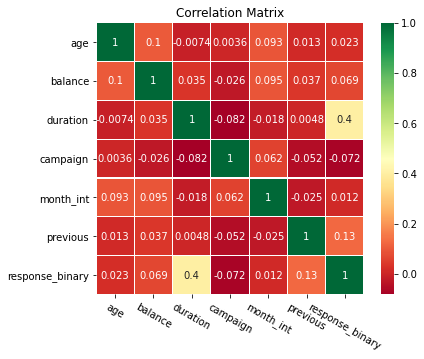

In [28]:
corr_data = df7[['age','balance','duration','campaign','month_int','previous','response_binary']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

The scatter matrix does not reveal any clear relationship among age, balance, duration and campaign.

To investigate more about correlation, a correlation matrix was plotted with all qualitative variables. Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”. Their influences on campaign outcome will be investigated further in the machine learning part.

## Part 4 : Machine Learning: Classification(RandomForestClassifier, LogisticRegression)

In [29]:
df8.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,month_int
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,21,oct,0.65,1,151,3,failure,0,0,10.0
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,21,oct,2.40,1,91,4,failure,1,1,10.0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,23,oct,2.33,1,143,3,failure,1,1,10.0
24080,56,technician,60000,married,secondary,yes,no,589,yes,no,23,oct,8.63,1,147,2,success,1,1,10.0
24127,51,admin.,50000,single,secondary,yes,no,3132,no,no,5,nov,7.48,1,176,1,failure,0,0,11.0


In [30]:
# here we are seperating object and numerical data types 
obj_col = []
num_col = []
for col in df8.columns:
    if df8[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

In [31]:
print("Object data type features ",obj_col)
print("Numerical data type features ",num_col)

Object data type features  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'month', 'poutcome']
Numerical data type features  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response', 'response_binary', 'month_int']


### Prepare Data for Classification

#### 4.1 Label Encoding of Categorical Variables.

Since machine learning algorithms only take numerical values, all five categorical variables (job, education, default, housing and loan) are transformed into dummy variables.

Dummy variables were used instead of continuous integers because these categorical variables are not ordinal. They simply represent different types rather than levels, so dummy variables are ideal to distinguish the effect of different categories.

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
df9 = df8[obj_col].apply(LabelEncoder().fit_transform)

In [34]:
df9.head()

,job,marital,education,targeted,default,housing,loan,month,poutcome
24060,0,1,2,1,0,0,0,10,0
24064,8,1,1,1,0,1,0,10,0
24077,4,1,2,1,0,1,0,10,0
24080,10,1,1,1,0,1,0,10,1
24127,0,2,1,1,0,0,0,9,0


In [35]:
df10 = df9.join(df8[num_col])

In [36]:
df10.head()

,job,marital,education,targeted,default,housing,loan,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response,response_binary,month_int
24060,0,1,2,1,0,0,0,10,0,33,50000,882,21,0.65,1,151,3,0,0,10.0
24064,8,1,1,1,0,1,0,10,0,33,70000,3444,21,2.40,1,91,4,1,1,10.0
24077,4,1,2,1,0,1,0,10,0,36,100000,0,23,2.33,1,143,3,1,1,10.0
24080,10,1,1,1,0,1,0,10,1,56,60000,589,23,8.63,1,147,2,1,1,10.0
24127,0,2,1,1,0,0,0,9,0,51,50000,3132,5,7.48,1,176,1,0,0,11.0


### Model Building

### 4.2 Logistic Regression Model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(42)

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
X = df10.drop("response", axis=1)
X.head()

,job,marital,education,targeted,default,housing,loan,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response_binary,month_int
24060,0,1,2,1,0,0,0,10,0,33,50000,882,21,0.65,1,151,3,0,10.0
24064,8,1,1,1,0,1,0,10,0,33,70000,3444,21,2.40,1,91,4,1,10.0
24077,4,1,2,1,0,1,0,10,0,36,100000,0,23,2.33,1,143,3,1,10.0
24080,10,1,1,1,0,1,0,10,1,56,60000,589,23,8.63,1,147,2,1,10.0
24127,0,2,1,1,0,0,0,9,0,51,50000,3132,5,7.48,1,176,1,0,11.0


In [40]:
y= df10[['response']]
y.head()

,response
24060,0
24064,1
24077,1
24080,1
24127,0


In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [42]:
lr = LogisticRegression()

In [43]:
lr.fit(X_train,y_train)

LogisticRegression()

In [44]:
cv_score= cross_val_score(lr,X_train,y_train, cv=5)
np.mean(cv_score)

0.7838676318510858

In [45]:
y_pred = lr.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       913
           1       0.56      0.28      0.37       296

    accuracy                           0.77      1209
   macro avg       0.68      0.60      0.62      1209
weighted avg       0.74      0.77      0.74      1209



In [47]:
confusion_matrix(y_pred,y_test)

array([[848, 213],
       [ 65,  83]], dtype=int64)

In [48]:
f1_score(y_pred,y_test)

0.37387387387387394

#### RFE

In [49]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(lr, 5)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [50]:
rfe.support_

array([False, False,  True, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False])

In [51]:
X_train.columns[rfe.support_]

Index(['education', 'housing', 'loan', 'poutcome', 'response_binary'], dtype='object')

In [52]:
cols = X_train.columns[rfe.support_]

In [53]:
lr.fit(X_train[cols],y_train)

LogisticRegression()

In [54]:
y_pred2 = lr.predict(X_test[cols])

In [55]:
f1_score(y_pred2,y_test)

1.0

In [56]:
confusion_matrix(y_pred2,y_test)

array([[913,   0],
       [  0, 296]], dtype=int64)

#### use statsmodel

In [57]:
import statsmodels.api as sm

In [58]:
X_train.head()

,job,marital,education,targeted,default,housing,loan,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response_binary,month_int
44424,10,1,1,1,0,0,0,1,0,33,60000,180,4,9.35,1,435,3,1,8.0
40216,2,0,1,1,0,1,0,6,0,43,120000,3780,9,1.12,2,202,3,0,6.0
29567,8,1,1,1,0,1,1,3,0,32,70000,1844,3,2.63,4,201,6,0,2.0
29707,10,2,2,0,0,1,0,3,0,41,60000,-89,3,3.25,4,251,4,0,2.0
32750,1,1,0,1,0,1,1,0,0,40,20000,572,17,2.85,1,318,1,0,4.0


Add intercept manually for statsmodel to work



In [59]:
X_train_sm = sm.add_constant(X_train[cols])
X_train_sm.head()

,const,education,housing,loan,poutcome,response_binary
44424,1.0,1,0,0,0,1
40216,1.0,1,1,0,0,0
29567,1.0,1,1,1,0,0
29707,1.0,2,1,0,0,0
32750,1.0,0,1,1,0,0


In [60]:
lr1 = sm.OLS(y_train, X_train_sm).fit()

In [61]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.785e+32
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        12:29:41   Log-Likelihood:             1.6014e+05
No. Observations:                4835   AIC:                        -3.203e+05
Df Residuals:                    4829   BIC:                        -3.202e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.898e-17   4.12e-17      1.431      0.153   -2.18e-17     1.4e-16
education       -2.355e-16   2.25e-17    -10.478      0.000    -2.8e-16   -1.91e-16
housing          3.016e-16   3.22e-17      9.359      0.000    2.38e-16    3.65e-16
loan            -1.908e-16   4.22e-17     -4.519      0.000   -2.74e-16   -1.08e-16
poutcome         2.125e-16      4e-17      5.312      0.000    1.34e-16    2.91e-16
response_binary     1.0000   3.94e-17   2.53e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      715.327   Durbin-Watson:                   1.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1003.233
Skew:                          -1.096   Prob(JB):                    1.41e-218
Kurtosis:                       2.579   Cond. No.                         6.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### VIF


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,age,12.61
3,targeted,7.10
2,education,6.99
18,month_int,6.60
10,salary,6.10
15,pdays,5.84
7,month,4.94
1,marital,4.56
12,day,4.18
5,housing,3.28


- Housing, loan, default, poutcome are imp feature from logistic regression model perspective

### 4.3 Random Forest Classifier

In [65]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV

In [66]:
skf = StratifiedKFold(n_splits=5, random_state=None)


In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
cv1_score = cross_val_score(rfc,X_train,y_train,cv=5)
np.mean(cv1_score)

1.0

In [77]:
y_pred1 = rfc.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       913
           1       1.00      1.00      1.00       296

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209



In [78]:
confusion_matrix(y_test,y_pred1)

array([[913,   0],
       [  0, 296]], dtype=int64)

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred1)

1.0

#### RFE

In [80]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe1 = RFE(rfc, 5)
rfe1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [81]:
rfe1.support_

array([False, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True, False,  True, False,  True,
       False])

In [82]:
X_train.columns[rfe1.support_]

Index(['housing', 'poutcome', 'duration', 'pdays', 'response_binary'], dtype='object')

In [83]:
cols = X_train.columns[rfe1.support_]

In [84]:
rfc.fit(X_train[cols],y_train)

RandomForestClassifier()

In [85]:
y_pred3 = rfc.predict(X_test[cols])

In [86]:
f1_score(y_pred3,y_test)

1.0

In [87]:
confusion_matrix(y_pred3,y_test)

array([[913,   0],
       [  0, 296]], dtype=int64)

- Housing, month, pdays, poutcome, duration are imp feature from RANDOM FOREST perspective.